# Computer Vision
## Exercise Sheet 3: Image Center, Edges, Keypoints
### Erhardt Barth / Philipp Gruening / Christoph Linse / Manuel Laufer
Universität zu Lübeck, Institut für Neuro- und Bioinformatik

In case of questions, contact us via email: *{barth, gruening, linse, laufer} @inb.uni-luebeck.de*

## Note: Please insert the names of all participating students:

1. Onurcan Köken
2. Sazid Rahman Simanto
3. Mokrane Ouarezki
4. Muhammad Junaid 


In [ ]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs4250.git'
    os.chdir('cs4250')

Cloning into 'cs4250'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 81 (delta 30), reused 67 (delta 20), pack-reused 0
Unpacking objects: 100% (81/81), done.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation

%matplotlib inline

## Exercise 3.1
### Finding the Image Center
Camera calibration refers to the process of computing the intrinsic and extrinsic parameters of the camera. It is a necessary step in many computer vision applications such as 3D scene reconstruction and recognition. One important intrinsic parameter is the image center. Print out the images `ueb311.jpg` and `ueb312.jpg` and estimate the image centers by using a ruler.

**Hint**: Make small printouts of the images to have enough space around them.

In [ ]:
def load_image_gray(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [ ]:
def load_image_gray_normalized(image_path):
    return load_image_gray(image_path).astype('float32')/255.

In [ ]:
def gradient(image):
    v = .5
    k_y = np.zeros((3, 3))
    k_y[0, 1] = -v
    k_y[2, 1] = +v

    k_x = np.zeros((3, 3))
    k_x[1, 0] = -v
    k_x[1, 2] = +v

    image = np.copy(image).astype('float32')

    gradient_x = cv2.filter2D(image, -1, k_x)
    gradient_y = cv2.filter2D(image, -1, k_y)

    return gradient_x, gradient_y


In [ ]:
img_path_1 = "/content/cs4250/data/exercise_3/ueb311.jpg"
img_path_2 = "/content/cs4250/data/exercise_3/ueb312.jpg"

Text(0.5, 1.0, 'Normalized Gray Image 2')

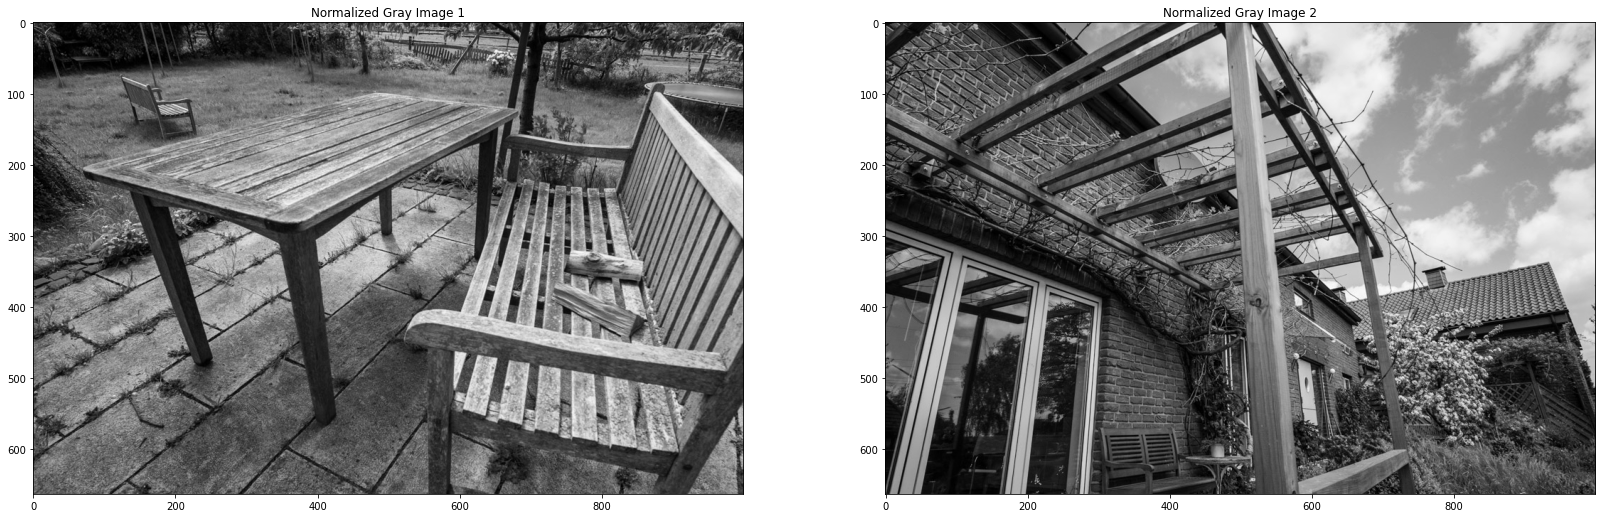

In [ ]:
img_1 = load_image_gray_normalized(img_path_1)
img_2 = load_image_gray_normalized(img_path_2)

plt.subplots(figsize=(28, 15))

plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.title("Normalized Gray Image 1")

plt.subplot(1,2,2)
plt.imshow(img_2, cmap='gray')
plt.title("Normalized Gray Image 2")

**finding center by vanishing points and Orthocenter theorem**

![](https://drive.google.com/uc?export=view&id=17Qhl4h0cfbZuEcVUMjLmbYGHyl-uqFTC)

![](https://drive.google.com/uc?export=view&id=1-i9Po6IPr_cnh6YtKQFE7DYlkeUaWrPj)

In [ ]:
print(img_1.shape)
print(img_2.shape)

(664, 1000)
(664, 1000)


Text(0.5, 1.0, 'Normalized Gray Image 2')

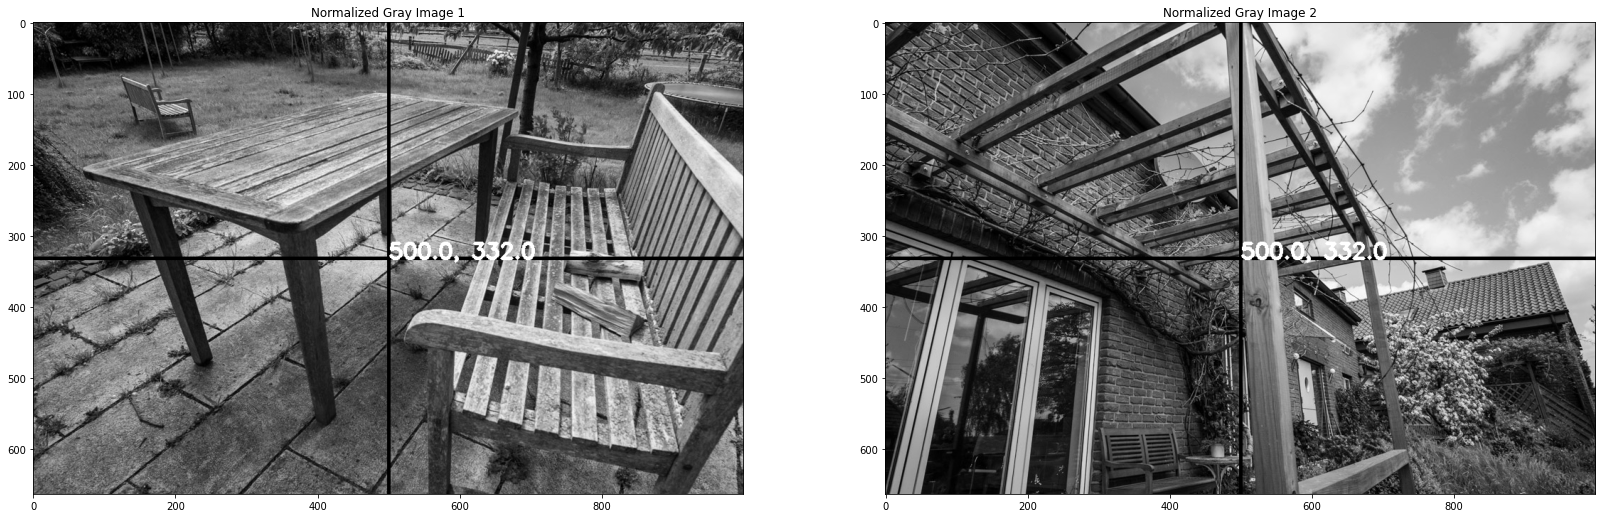

In [ ]:
img_1 = load_image_gray_normalized(img_path_1)
h_1, w_1 = img_1.shape
img_1 = cv2.line(img_1, (0, int(h_1/2)), (w_1, int(h_1/2)), (0, 0, 0), 3)
img_1 = cv2.line(img_1, (int(w_1/2), 0), (int(w_1/2), h_1), (0, 0, 0), 3)
center_1 = str(w_1/2) + ", " + str(h_1/2)
img_1 = cv2.putText(img_1, center_1, (int(w_1/2), int(h_1/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (1, 1, 1), 3, cv2.LINE_AA)

img_2 = load_image_gray_normalized(img_path_2)
h_2, w_2 = img_2.shape
img_2 = cv2.line(img_2, (0, int(h_2/2)), (w_2, int(h_2/2)), (0, 0, 0), 3)
img_2 = cv2.line(img_2, (int(w_2/2), 0), (int(w_2/2), h_2), (0, 0, 0), 3)
center_2 = str(w_2/2) + ", " + str(h_2/2)
img_2 = cv2.putText(img_2, center_2, (int(w_2/2), int(h_2/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (1, 1, 1), 3, cv2.LINE_AA)

plt.subplots(figsize=(28, 15))

plt.subplot(1,2,1)
plt.imshow(img_1, cmap='gray')
plt.title("Normalized Gray Image 1")

plt.subplot(1,2,2)
plt.imshow(img_2, cmap='gray')
plt.title("Normalized Gray Image 2")

Is there any difference between camera center and image center ???


Finding image centers!

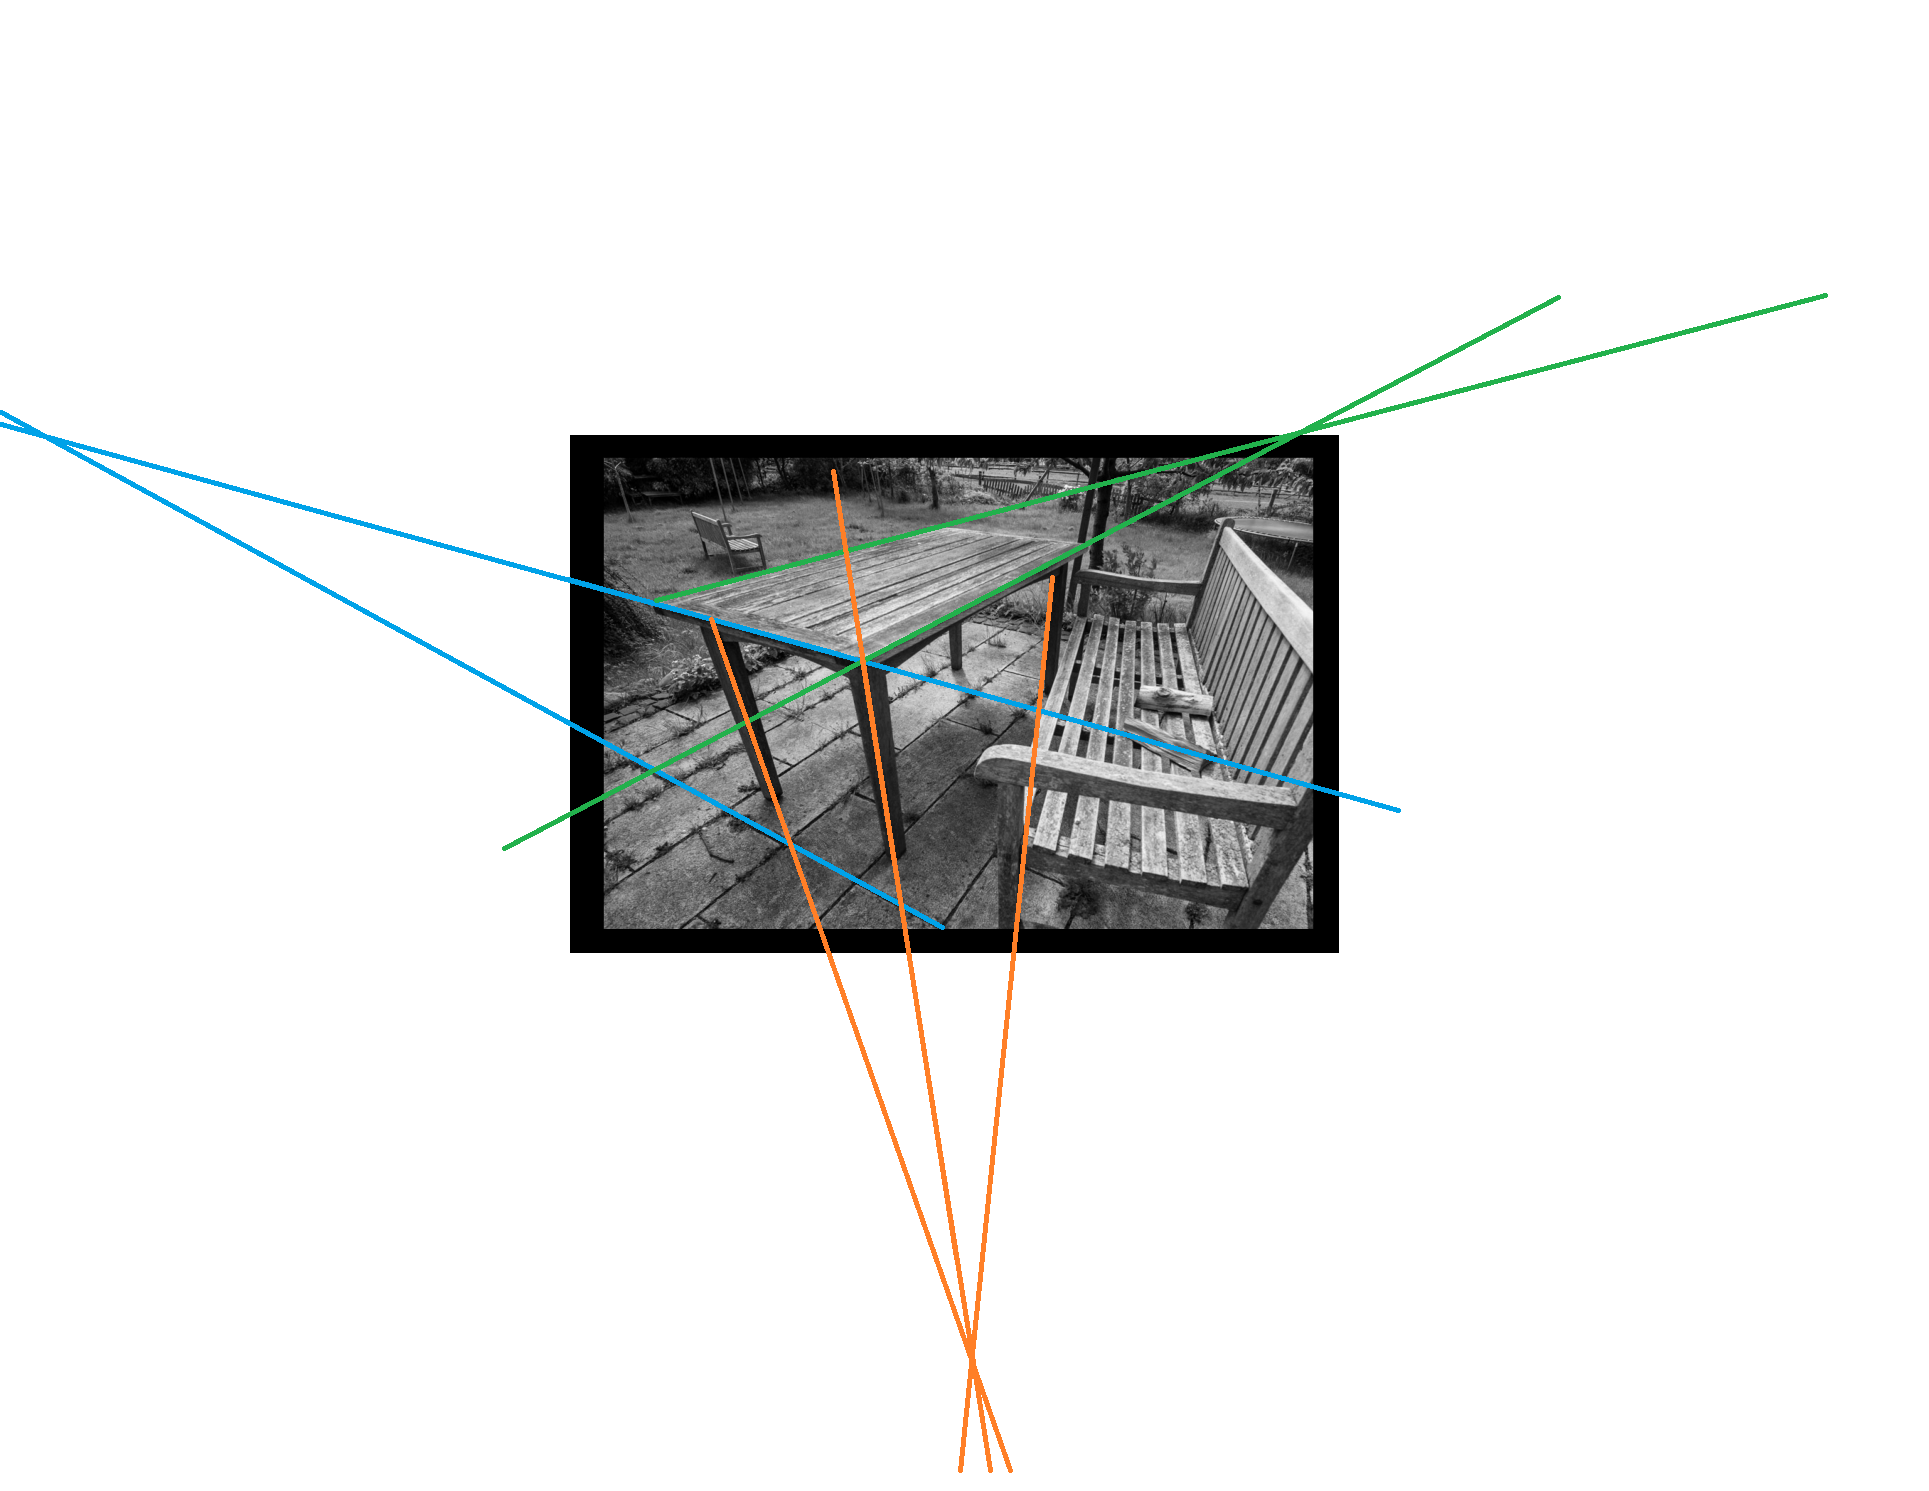

In [2]:
from IPython import display
display.Image("figures/ex3_1_1.png")

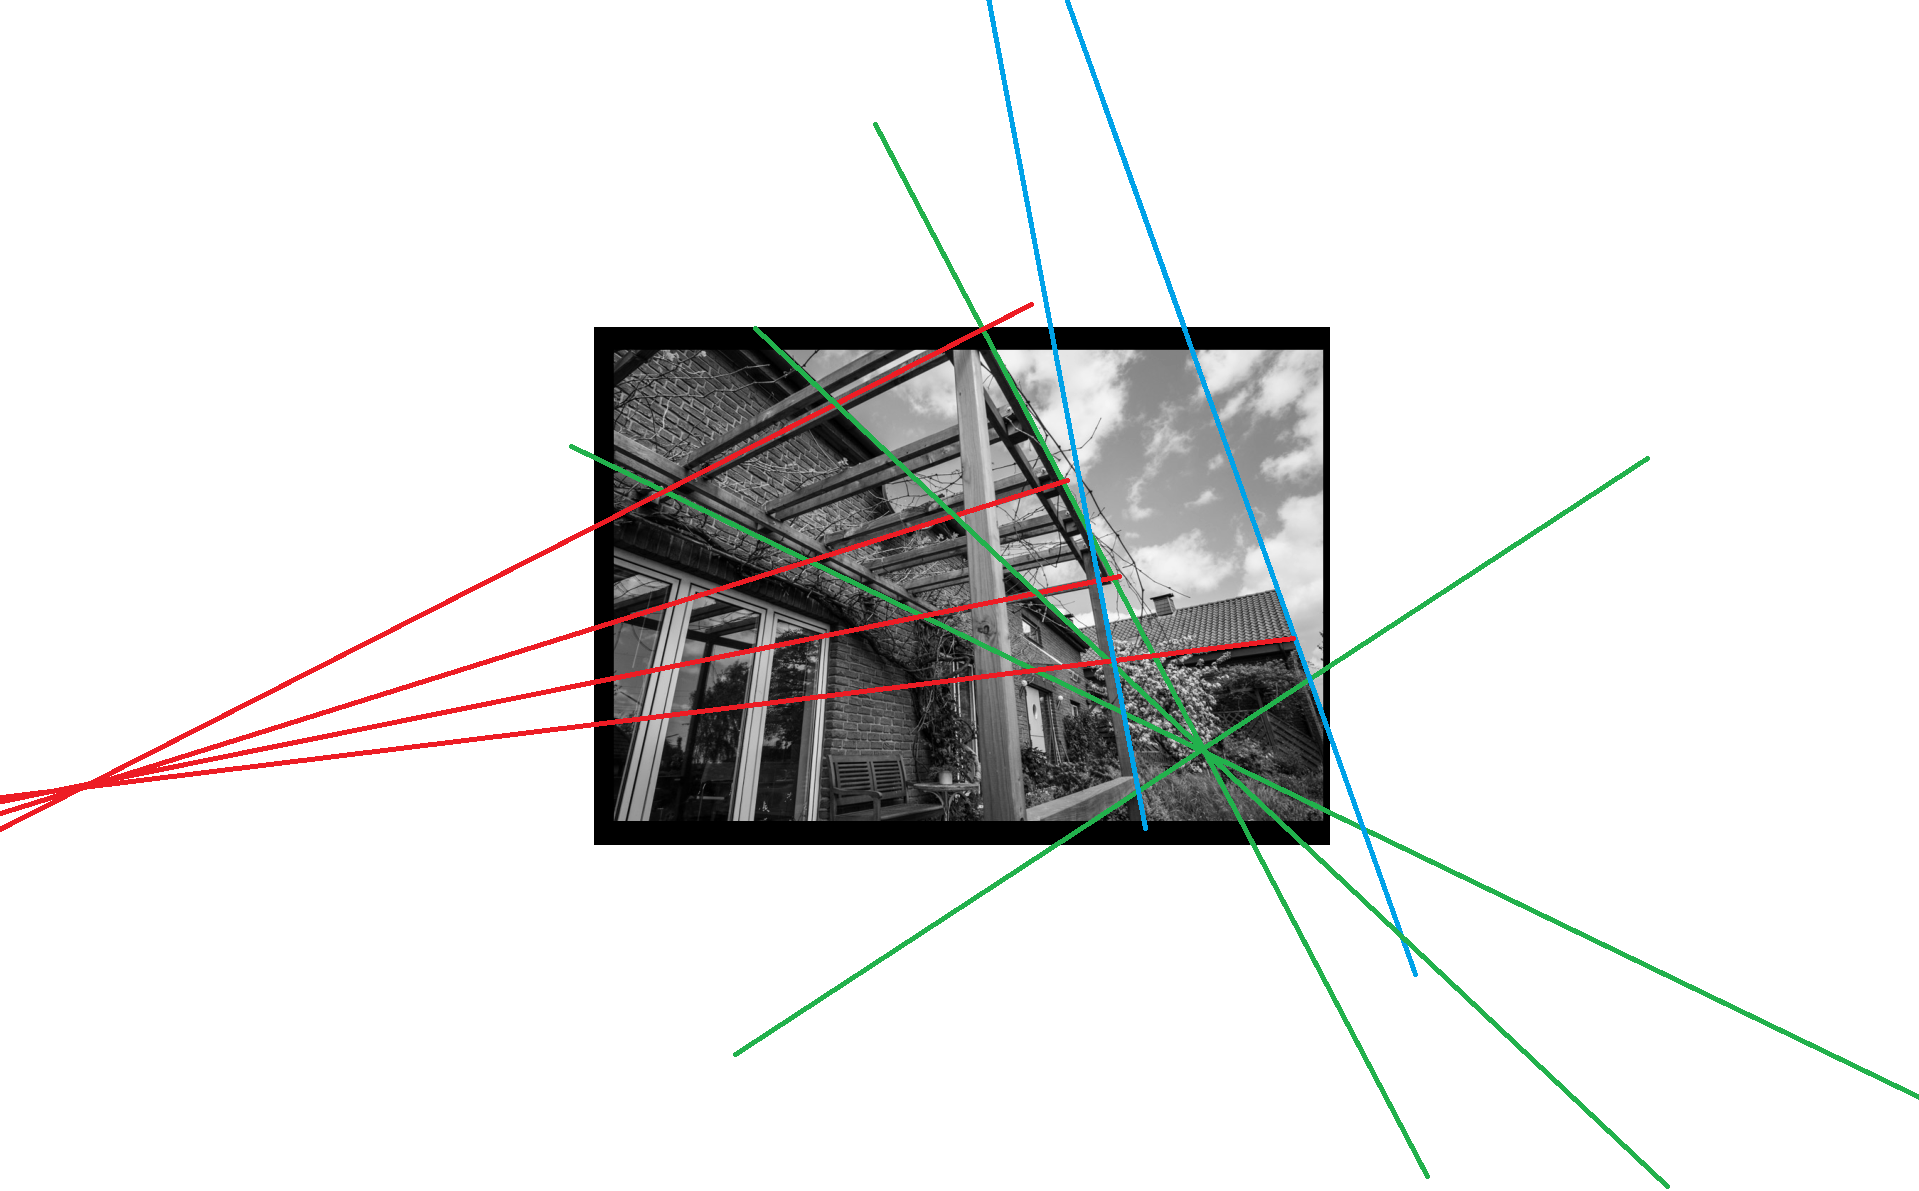

In [3]:
display.Image("figures/ex3_1_2.png")

## Exercise 3.2.1
### Edge Detection
Open the image `ueb32.jpg` in Python and show the image gradients $d_x$ and $d_y$. Compute the magnitude of gradients image and apply a threshold to retain only the edges of the object. For those edges, compute and show the gradient angle image (`np.arctan2`). How can you tell the angle of the gradient from looking only at the gradients?

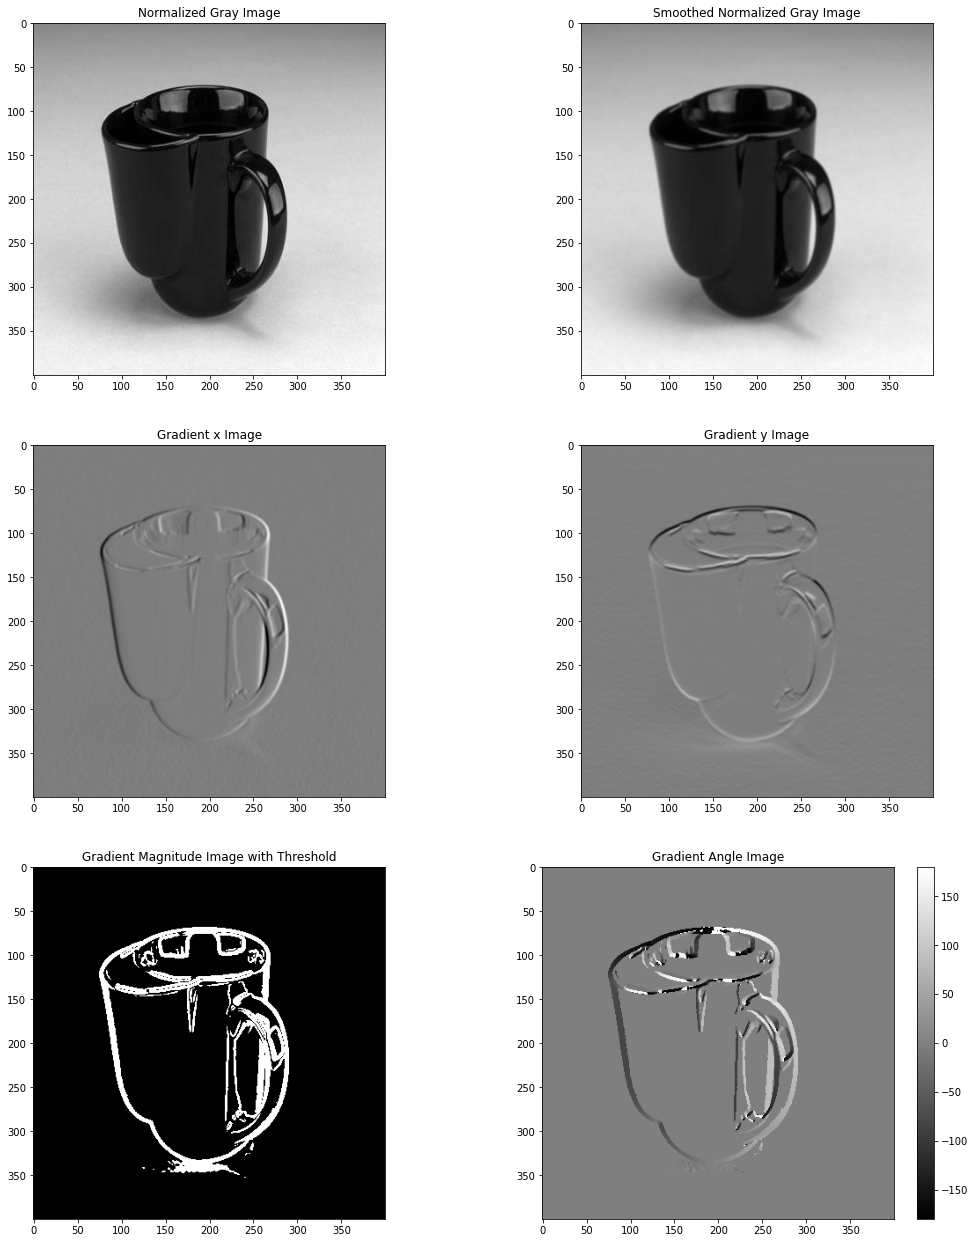

In [ ]:
# load image, (400, 400) shaped normalized img, float32
image = load_image_gray_normalized("/content/cs4250/data/exercise_3/ueb32.jpg")
plt.subplots(figsize=(18, 22))
plt.subplot(3,2,1)
plt.imshow(image, cmap='gray')
plt.title("Normalized Gray Image")

# smooth image
# removing Gaussian noise from an image, cv2.BORDER_DEFAULT is also possible instead of 0
# filter with a dimension of the 2D matrix in odd numbers only and the sigmaX, which if provided 0, will be automatically calculated by the function
smooth_image = cv2.GaussianBlur(image,(5,5), 0) # (400, 400), float32, Gaussian noise removed img
plt.subplot(3,2,2)
plt.imshow(smooth_image, cmap='gray')
plt.title("Smoothed Normalized Gray Image")

# compute and show gradient images 
# make images comparable
gradient_x, gradient_y = gradient(smooth_image) # for both: contains positive/negative/zero values, (400, 400), float32
# adjust the range of pixels
min_pixel = min(gradient_x.min(), gradient_y.min()) # -0.20255056
max_pixel = max(gradient_x.max(), gradient_y.max()) # 0.20997241
plt.subplot(3,2,3)
plt.imshow(gradient_x, cmap='gray', vmin=min_pixel, vmax=max_pixel)
plt.title("Gradient x Image")
plt.subplot(3,2,4)
plt.imshow(gradient_y, cmap='gray', vmin=min_pixel, vmax=max_pixel)
plt.title("Gradient y Image")

# compute gradient magnitude
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y) # (400, 400), float32, min: 0, max: 0.22934803
# alternative way
# gradient_magnitude = np.sqrt(np.square(np.absolute(gradient_x)) + np.square(np.absolute(gradient_y))) 
# apply threshold
gradient_threshold = 0.02
gradient_thresh_img = np.zeros_like(gradient_magnitude)
gradient_thresh_img[(gradient_magnitude > gradient_threshold)] = 1

plt.subplot(3,2,5)
plt.imshow(gradient_thresh_img, cmap='gray')
plt.title("Gradient Magnitude Image with Threshold")

# compute an angle image that should be in range [-180,+180]
# thinning by non-maximum suppression where inputs are: the gradient magnitude s and the gradient direction theta
# get gradient direction theta
gradient_direction_angle = np.rad2deg(np.arctan2(gradient_x, gradient_y)) # convert radian to degree

# show angles only for real edges
# masking by threshold
mask=((gradient_magnitude>gradient_threshold)) # max: 0.22934803 which is gradient magnitude itself
#mask=(gradient_magnitude>0.01).astype("float32")
gradient_angle_image = gradient_direction_angle * mask

plt.subplot(3,2,6)
plt.imshow(gradient_angle_image, cmap='gray')
plt.title("Gradient Angle Image")
plt.colorbar()

for angle, we are going through a patch, we follow the angle and check the direction, so after taking the direction, check x,y and the angle from origin.

How can you tell the angle of the gradient from looking only at the gradients?

**Ans:** We are looking for larger pixel values compared to the neighbors, so gradients direcet to higher pixel values which is the brighter regions 

## Exercise 3.2.2
### Canny Edge Detector
Open the image `ueb32.jpg` in Python and use the OpenCV Canny algorithm to find the edges in the image.
Compare the result with the magnitude of gradient image. Display both results side by side using `plt.subplots`.
Comment on how the two results differ and why.

Text(0.5, 1.0, 'Canny Image, threshold: 150 - 300')

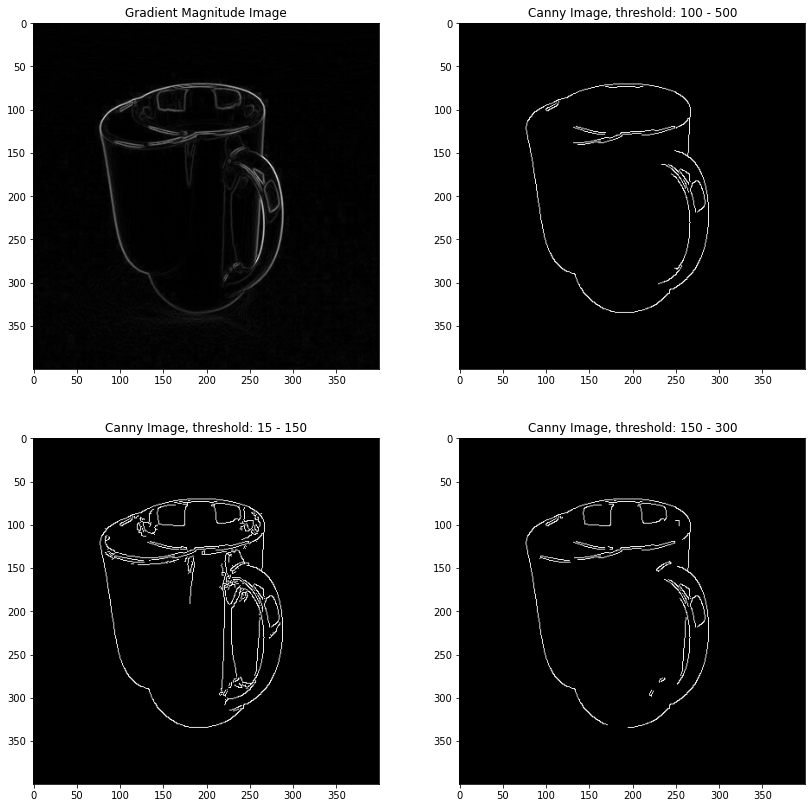

In [ ]:
# load image
image = load_image_gray("/content/cs4250/data/exercise_3/ueb32.jpg")
# compute magnitude of gradient image
gradient_x, gradient_y = gradient(image)
# gradient_x, gradient_y = gradient(smooth_image) # for smoothing
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y) # (400, 400), float32, min: 0, max: 0.22934803
# apply canny
canny_img_1 = cv2.Canny(image, 100, 500) # lower and upper thresholds
canny_img_2 = cv2.Canny(image,  15, 150)
canny_img_3 = cv2.Canny(image, 150, 300)

# compare results
plt.subplots(figsize=(14, 14))

plt.subplot(2,2,1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude Image")

plt.subplot(2,2,2)
plt.imshow(canny_img_1, cmap='gray')
plt.title("Canny Image, threshold: 100 - 500")

plt.subplot(2,2,3)
plt.imshow(canny_img_2, cmap='gray')
plt.title("Canny Image, threshold: 15 - 150")

plt.subplot(2,2,4)
plt.imshow(canny_img_3, cmap='gray')
plt.title("Canny Image, threshold: 150 - 300")

How the two results differ and why?

**Ans:**
* for Gradient Magnitude Image:

  * Image is smoothed in our application.
  * We only checked the gradient magnitue here.

* for Canny Image:

1. **Smooth the image, noise reduction**: remove the noise in the image with a 5x5 Gaussian filter
2. **Find Intensity Gradient**: filtered with a Sobel kernel in both horizontal and vertical direction to find edge gradient and direction for each pixel the Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.
3. **Non-Maximum Suppression: (Thinning operation)** remove any unwanted pixels, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Relate the edge direction so that it can be traced along edges by checking neighborhood and local max. The result you get is a binary image with "thin edges".
4. **Hysteresis Thresholding (Linking operation)**: for this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. A pixel can be between minVal maxVal, but if it is not connected to any "sure-edge", then it is also discarded.

* when thresholds are very close, the linking is getting less



## Exercise 3.3
### Key Point Detection
Implement the following key-point detectors:
* local maxima of $K$
* local maxima of $K$ − $\alpha$ $H^2$, with $\alpha$ as weighting parameter

The function is supposed to return images of the same size as the input, where the pixels contain $K$ or $K$ − $\alpha$ $H^2$.

$K$ and $H$ should be the invariants of the structure tensor $J$ (see script).
Evaluate the detectors above on two kinds of test images: (i) the synthetic image `ueb331.npy`, (ii) the
picture `ueb332.jpg`.

Comment your results with a focus on
1. the localization of the key points
2. the influence of the $H$ term as controlled via the parameter $\alpha$.

**Question**: Why do you filter the image with a Gaussian kernel a second time? It is **not** about noise removal!

**Hint**: Use the provided functions `find_local_max` and `plot_marks`.

**Ans:** It is used to make the local averaging operation, to be able to compute J, the structure tensor, which will be later used to compute H (trace of J, Hessian Matrix) and K (determinant of J)

In [ ]:
def find_local_max(keypoints, thres=1e-6, k=3):
    kernel = np.ones((k, k))
    kernel[k//2, k//2] = 0
    local_max = keypoints > thres + dilation(keypoints, kernel)

    return local_max

In [ ]:
def plot_marks(map, ax=None):
    if ax is None:
        _, ax = plt.subplots(1)
    col, row = np.nonzero(map)

    ax.plot(row, col, 'r.')

In [ ]:
def key_points_structure(image, alpha, sigma=.1):
    pass
    # image parameters
    # kernel size should be odd, if 0, then it is computed from sigma value
    kernel_size = 5
    # 0. filter with Gaussian kernel with sigma
    # Gaussian Blurring is the smoothing technique that uses a low pass filter whose weights are derived from a Gaussian function
    # Sigma is the Gaussian standard deviation
    filtered_img = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    # 1. partial derivatives
    gradient_x, gradient_y = gradient(filtered_img)
    # 2. product images
    I_x_x = np.square(gradient_x)
    I_y_y = np.square(gradient_y)
    I_x_y = np.multiply(gradient_x, gradient_y)
    # 3. filter with gaussian kernel with sigma = 1
    # used to take local averages
    I_x_x_2 = cv2.GaussianBlur(I_x_x, (kernel_size, kernel_size), 1)
    I_y_y_2 = cv2.GaussianBlur(I_y_y, (kernel_size, kernel_size), 1)
    I_x_y_2 = cv2.GaussianBlur(I_x_y, (kernel_size, kernel_size), 1)
    # 4. compute invarians for J
    # J is the structure tensor
    # H is the trace of J, eigenvalue_1 + eigenvalue_2
    H = I_x_x_2 + I_y_y_2 
    # K is the determinant of J
    K = np.multiply(I_x_x_2, I_y_y_2) - np.multiply(I_x_y_2, I_x_y_2)
    K_minus_H = K - alpha * np.multiply(H, H)

    return K, K_minus_H
   

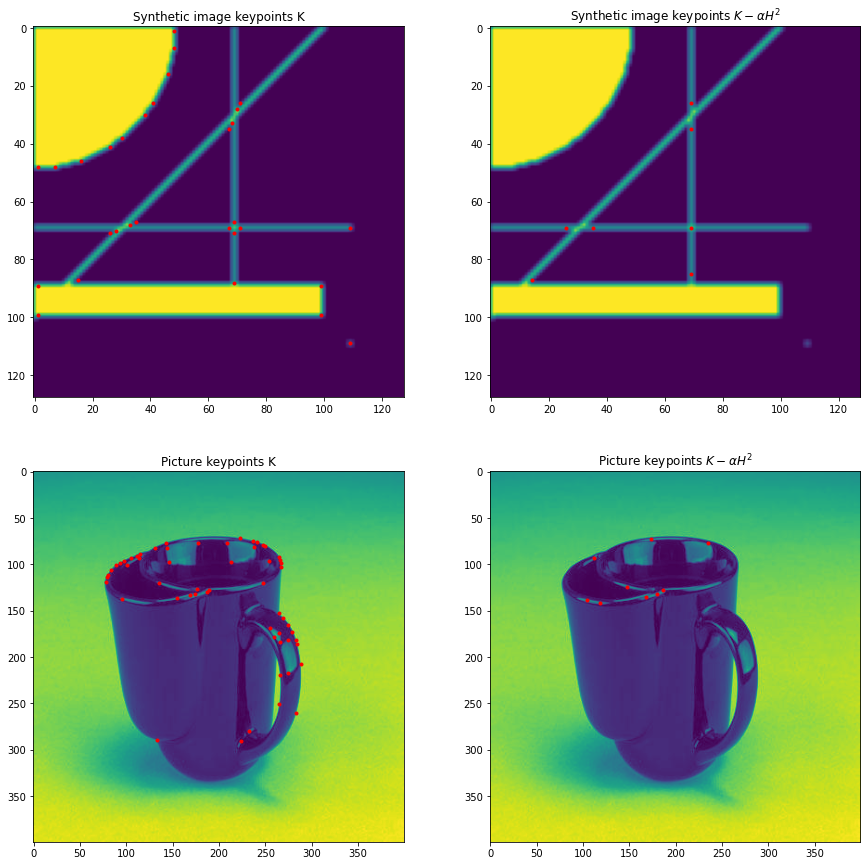

In [ ]:
# define alpha, sigma, and k
alpha = 0.5 # weighting parameter
sigma = 0.5 # the Gaussian standard deviation
k = 5
# load images
synthetic_image = np.load("/content/cs4250/data/exercise_3/ueb331.npy")
picture = load_image_gray_normalized("/content/cs4250/data/exercise_3/ueb332.jpg")
# extract keypoints
# (128, 128) shape of keypoints_K and keypoints_K_minus_H
keypoints_K_1, keypoints_K_minus_H_1 = key_points_structure(synthetic_image, alpha, sigma)
keypoints_K_2, keypoints_K_minus_H_2 = key_points_structure(picture, alpha, sigma)
# show found keypoints (K, K_minus_H) for both images
# example

_, ax = plt.subplots(2, 2, figsize=(15, 15))
# the synthetic image
local_max = find_local_max(keypoints_K_1)
ax[0][0].imshow(synthetic_image)
plot_marks(local_max, ax[0][0])
ax[0][0].title.set_text("Synthetic image keypoints K")

local_max = find_local_max(keypoints_K_minus_H_1)
ax[0][1].imshow(synthetic_image)
plot_marks(local_max, ax[0][1])
ax[0][1].title.set_text(r'Synthetic image keypoints $K - \alpha H^{2}$')

# the picture
local_max = find_local_max(keypoints_K_2)
ax[1][0].imshow(picture)
plot_marks(local_max, ax[1][0])
ax[1][0].title.set_text("Picture keypoints K")

local_max = find_local_max(keypoints_K_minus_H_2)
ax[1][1].imshow(picture)
plot_marks(local_max, ax[1][1])
ax[1][1].title.set_text(r'Picture keypoints $K - \alpha H^{2}$')

Intrinsic dimentions are the ones that are giving information, which is the key points. Generally curves, edges, corners, etc. We are taking a patch, and check the gradient directions, if direction is 1, then intrinsic dim is 1. 

Why we are taking the second gaussian: The reason is to be able to perform integral operation as multiplication to be able to compute structure tensor J. and it is not local averaging, it is local area that you are calculation, think about image filtering, sliding window, convolution operation, they are all the same. You just take a part of image as patch and multply by the kernel.

# References:

for Gaussian Blur: 

* https://tbhaxor.com/basic-image-processing-using-python3-and-opencv/

* https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1

* https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/

for Magnitude:

* https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga6d3b097586bca4409873d64a90fe64c3

* https://www.geeksforgeeks.org/implement-canny-edge-detector-in-python-using-opencv/

for Canny:

* https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
